## this is the beginning of my python programming in face swapper

# Imports

In [140]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import os
import glob

import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

# Face Analysis model 

In [141]:
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640,640))
swapper = insightface.model_zoo.get_model('inswapper_128.onnx',download=False,download_zip=False)


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\bansa/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\bansa/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\bansa/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\bansa/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\bansa/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.

# Reading and Displaying the image


In [142]:
# Location of this jupyter notebook
notebook_location = os.getcwd()


#Location of the images i have stored locally
img1_path = notebook_location + "/images/ryan.jpg"
himymLocation = notebook_location + "/images/himym.jpg"
maxlocation = notebook_location + "/images/maxverstappen.jpg"


# Loaded the images from my folder and displaying them

In [143]:
# Load the image using OpenCV
ryan = cv.imread(img1_path)
himym = cv.imread(himymLocation)
maxVerstappen = cv.imread(maxlocation)

In [144]:
# Convert the image from BGR to RGB
#OpenCV loads the image in BGR format, convert to RGB for matplotlib
ryan = cv.cvtColor(ryan, cv.COLOR_BGR2RGB)
himym = cv.cvtColor(himym, cv.COLOR_BGR2RGB)
maxVerstappen = cv.cvtColor(maxVerstappen, cv.COLOR_BGR2RGB)

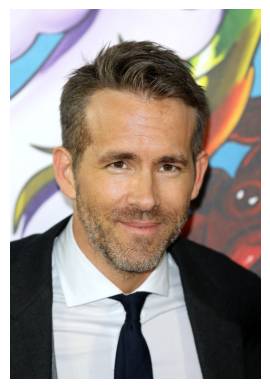

In [145]:
# Display the image using Matplotlib
plt.imshow(ryan)
plt.axis('off')  # Optional: to turn off the axis
plt.show()

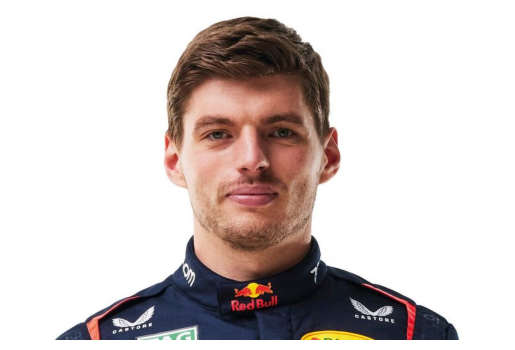

In [146]:
# Display the image using Matplotlib
plt.imshow(maxVerstappen)
plt.axis('off')  # Optional: to turn off the axis
plt.show()

In [147]:
# #Alternative way of converting image from BGR to RGB
# plt.imshow(img3[:,:,::-1])
# plt.axis("off")
# plt.show()

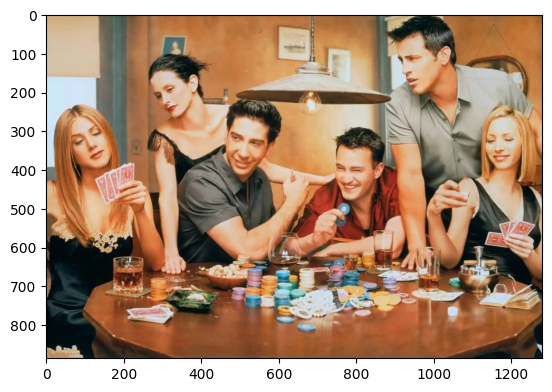

In [148]:
friends = ins_get_image('t1')
friends = cv.cvtColor(friends,cv.COLOR_BGR2RGB)
plt.imshow(friends)
plt.show()

# Detecting the Faces

In [149]:
# Detected faces

ryan_face = app.get(ryan)
friendsCast = app.get(friends)
max_face = app.get(maxVerstappen)

The faces have been recognised and are saved as a list as seen above

Now to display the faces recognised.

# Displaying the faces
## Showing individual faces detected above

The faces have been detected by the model and now are displayed as shown

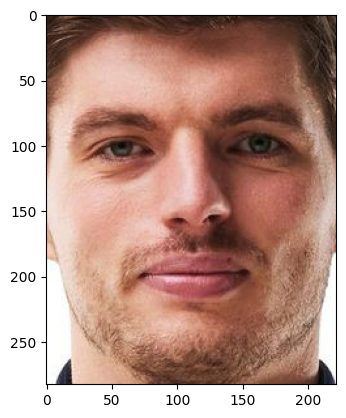

In [151]:
assert len(max_face) == 1
max_face = max_face[0]
bbox = max_face['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(max[bbox[1]:bbox[3],bbox[0]:bbox[2]])
plt.show()

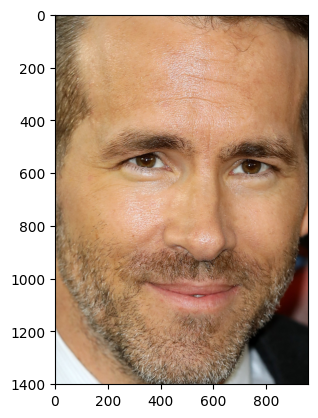

In [152]:
assert len(ryan_face) == 1
ryan_face = ryan_face[0]
bbox = ryan_face['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(johncena[bbox[1]:bbox[3],bbox[0]:bbox[2]])
plt.show()

### Creating the boxes

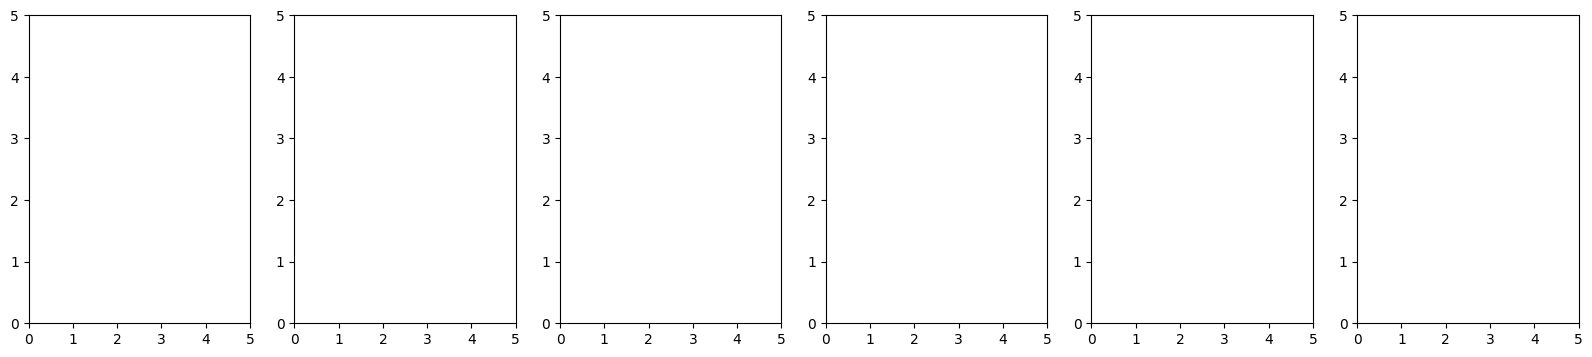

In [153]:
# Figure is the whole frame here
# axs are the number of boxes
#subplots(rows, coloumns, figsize=(width, height)
fig, axs = plt.subplots(1, 6, figsize=(20, 4))

# Loop through each subplot and turn off the axes
for ax in axs:
    ax.axis([0,5,0,5])

### Displaying individual faces into the boxes

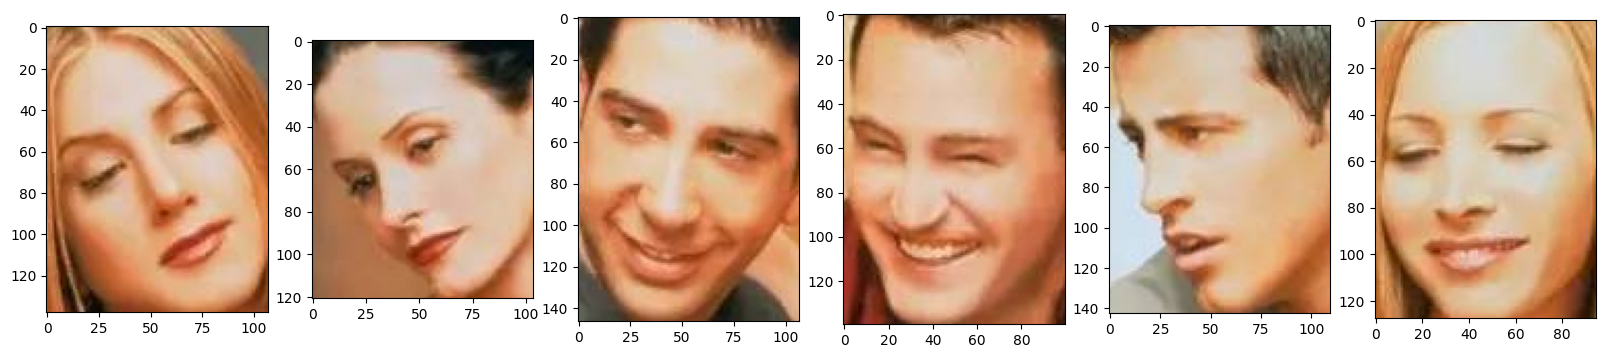

In [154]:
friends = ins_get_image('t1')
fig, axs = plt.subplots(1, 6, figsize=(20, 10))

for i, face in enumerate(faces):
    bbox = face['bbox']
    bbox = [int(b) for b in bbox]
    axs[i].imshow(friends[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
    axs[i].axis('on')

### Displaying a single face from all 6


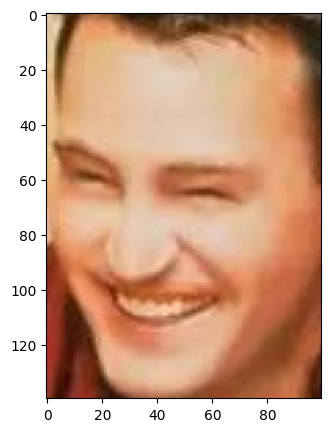

In [155]:
fig, ax = plt.subplots(figsize=(5, 5))

# Access the 4th face (index 3)
face = faces[3]
bbox = face['bbox']
bbox = [int(b) for b in bbox]

# Display the 4th face in a single plot
ax.imshow(friends[bbox[1]:bbox[3], bbox[0]:bbox[2], ::-1])
ax.axis('on')  # You can use 'off' to hide the axis if needed

plt.show()








# Swapping the Faces ( FINALLY )

In [156]:
# Sorts left to right
faces = sorted(faces, key = lambda x : x.bbox[0])
res = friends.copy()
assert len(faces)==6 # Confirm 5 faces found
source_face = ryan_face

In [157]:
# source_face

In [158]:
bbox = source_face['bbox']
bbox = [int(b) for b in bbox]
# plt.imshow(ryan[bbox[1]:bbox[3],bbox[0]:bbox[2]])
# plt.show()

In [159]:
print(type(res))
print(type(face))
print(type(source_face))

<class 'numpy.ndarray'>
<class 'insightface.app.common.Face'>
<class 'insightface.app.common.Face'>


In [165]:
# for swapping all faces
res = friends.copy()
for face in friendsCast:
   res = swapper.get(res, face, max_face, paste_back=True)

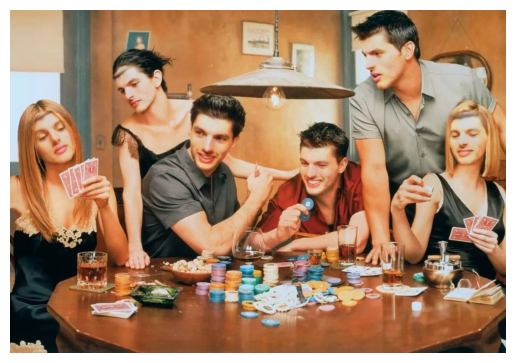

In [166]:
plt.imshow(res[:,:,::-1])
plt.axis('off')
plt.show()

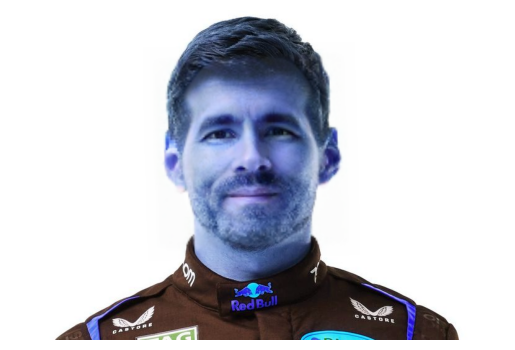

In [170]:
# Assuming `swapper` is the initialized swapping object
# The method accepts 2 or 3 arguments
res = max.copy()
# Loop through each face to swap with the source face

res = swapper.get(res, max_face, ryan_face)  # Passing the image and the face to replace



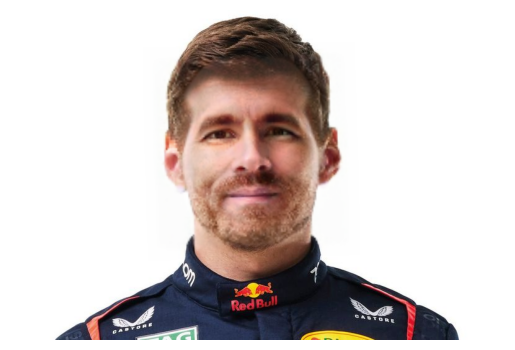

In [172]:
# Display the resulting image
plt.imshow(res)
plt.axis('off')
plt.show()
